## Create Ultralytics Hub

In [1]:
from waffle_hub.hub.adapter.ultralytics import UltralyticsHub
from waffle_hub import TaskType

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:16: UserWarning: 
            torch 1.13.1+cu117 has not been tested.
            We recommend you to use one of ['1.13.1']
            
  warnings.warn(
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:56: UserWarning: 
                ultralytics 8.0.91 has not been tested.
                We recommend you to use one of ['8.0.87']
                
  warnings.warn(


In [2]:
UltralyticsHub.MODEL_TYPES

{'object_detection': {'yolov8': ['n', 's', 'm', 'l', 'x']},
 'classification': {'yolov8': ['n', 's', 'm', 'l', 'x']},
 'instance_segmentation': {'yolov8': ['n', 's', 'm', 'l', 'x']}}

In [3]:
ultralytics_hub = UltralyticsHub.new(
    name="ultralytics_mnist_detection",
    task=TaskType.OBJECT_DETECTION,
    model_type="yolov8",
    model_size="n",
    categories=["1", "2"]
)

In [4]:
ultralytics_hub.categories

[{'supercategory': 'object', 'name': '1'},
 {'supercategory': 'object', 'name': '2'}]

## Create Huggingface Hub 

In [5]:
from waffle_hub.hub.adapter.hugging_face import HuggingFaceHub
from waffle_hub import TaskType

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:56: UserWarning: 
                transformers 4.28.1 has not been tested.
                We recommend you to use one of ['4.27.4']
                
  warnings.warn(


In [6]:
HuggingFaceHub.MODEL_TYPES

{'object_detection': {'DETA': {'base': 'jozhang97/deta-resnet-50'},
  'DETR': {'base': 'facebook/detr-resnet-50',
   'large': 'facebook/detr-resnet-101'},
  'YOLOS': {'tiny': 'hustvl/yolos-tiny'}},
 'classification': {'ViT': {'tiny': 'WinKawaks/vit-tiny-patch16-224',
   'base': 'google/vit-base-patch16-224'}}}

In [7]:
huggingface_hub = HuggingFaceHub.new(
    name="huggingface_mnist_detection",
    task=TaskType.OBJECT_DETECTION,
    model_type="DETR",
    model_size="base",
    categories=["1", "2"]
)

## Create Tx Model Hub

In [8]:
from waffle_hub.hub.adapter.tx_model import TxModelHub
from waffle_hub import TaskType

In [9]:
TxModelHub.MODEL_TYPES

{'object_detection': {'YOLOv5': ['s', 'm', 'l']},
 'classification': {'Classifier': ['s', 'm', 'l']}}

In [10]:
tx_model_hub = TxModelHub.new(
    name="tx_model_mnist_detection",
    task=TaskType.OBJECT_DETECTION,
    model_type="YOLOv5",
    model_size="s",
    categories=["1", "2"]
)

## Train

### Load Dataset

In [11]:
from waffle_hub.dataset import Dataset
from waffle_hub import DataType

dataset = Dataset.load("mnist_det")

### Ultralytics

In [12]:
dataset_dir = dataset.export(DataType.YOLO)
train_result = ultralytics_hub.train(
    dataset_dir,
    image_size=320,
    epochs=50,
    batch_size=16
)
train_result

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/dataset/dataset.py:1051: UserWarning: datasets/mnist_det/exports/YOLO already exists. Removing exist export and override.
  warnings.warn(f"{export_dir} already exists. Removing exist export and override.")
Ultralytics YOLOv8.0.91 🚀 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/lhj/ws/dev/waffle/datasets/mnist_det/exports/YOLO/data.yaml, epochs=50, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=0, workers=2, project=hubs/ultralytics_mnist_detection, name=artifacts, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False

TrainResult(best_ckpt_file=PosixPath('hubs/ultralytics_mnist_detection/weights/best_ckpt.pt'), last_ckpt_file=PosixPath('hubs/ultralytics_mnist_detection/weights/last_ckpt.pt'), metrics=[[{'tag': 'epoch', 'value': 0.0}, {'tag': 'train/box_loss', 'value': 1.519}, {'tag': 'train/cls_loss', 'value': 4.1718}, {'tag': 'train/dfl_loss', 'value': 1.0838}, {'tag': 'metrics/precision(B)', 'value': 0.00223}, {'tag': 'metrics/recall(B)', 'value': 0.66667}, {'tag': 'metrics/mAP50(B)', 'value': 0.01552}, {'tag': 'metrics/mAP50-95(B)', 'value': 0.01359}, {'tag': 'val/box_loss', 'value': 0.51572}, {'tag': 'val/cls_loss', 'value': 3.5799}, {'tag': 'val/dfl_loss', 'value': 0.84739}, {'tag': 'lr/pg0', 'value': 0.0964}, {'tag': 'lr/pg1', 'value': 0.0004}, {'tag': 'lr/pg2', 'value': 0.0004}], [{'tag': 'epoch', 'value': 1.0}, {'tag': 'train/box_loss', 'value': 1.4765}, {'tag': 'train/cls_loss', 'value': 4.0175}, {'tag': 'train/dfl_loss', 'value': 1.0779}, {'tag': 'metrics/precision(B)', 'value': 0.00222}, 

### Huggingface

In [13]:
import torch
torch.use_deterministic_algorithms(False)

In [14]:
dataset_dir = dataset.export(DataType.HUGGINGFACE)
train_result = huggingface_hub.train(
    dataset_dir,
    image_size=320,
    epochs=50,
    batch_size=16
)
train_result

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/dataset/dataset.py:1051: UserWarning: datasets/mnist_det/exports/HUGGINGFACE already exists. Removing exist export and override.
  warnings.warn(f"{export_dir} already exists. Removing exist export and override.")


Dataset generator downloaded and prepared to /home/lhj/.cache/huggingface/datasets/generator/default-2829f4fedc3b4500/0.0.0. Subsequent calls will reuse this data.


Dataset generator downloaded and prepared to /home/lhj/.cache/huggingface/datasets/generator/default-d5fbddcc04d40766/0.0.0. Subsequent calls will reuse this data.


Dataset generator downloaded and prepared to /home/lhj/.cache/huggingface/datasets/generator/default-948875159fe8df55/0.0.0. Subsequent calls will reuse this data.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Some weights of DetrForObjectDetection were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized because the shapes did not match:
- class_labels_classifier.weight: found shape torch.Size([92, 256]) in the checkpoint and torch.Size([3, 256]) in the model instantiated
- class_labels_classifier.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/hub/adapter/hugging_face/train_input_helper.py:173: UserWarning: pretrained model's image si

Epoch,Training Loss,Validation Loss
1,No log,1.385532


TrainResult(best_ckpt_file=PosixPath('hubs/huggingface_mnist_detection/weights/best_ckpt'), last_ckpt_file=PosixPath('hubs/huggingface_mnist_detection/weights/last_ckpt'), metrics=[[{'tag': 'train_loss', 'value': 1.3855316638946533}, {'tag': 'train_runtime', 'value': 1.1718}, {'tag': 'train_samples_per_second', 'value': 68.271}, {'tag': 'train_steps_per_second', 'value': 8.534}, {'tag': 'epoch', 'value': 1.0}, {'tag': 'step', 'value': 5}, {'tag': 'loss', 'value': 5.2548}, {'tag': 'learning_rate', 'value': 4.9e-05}, {'tag': 'eval_loss', 'value': 1.2507762908935547}, {'tag': 'eval_runtime', 'value': 0.4487}, {'tag': 'eval_samples_per_second', 'value': 22.287}, {'tag': 'eval_steps_per_second', 'value': 4.457}], [{'tag': 'train_loss', 'value': 1.116162896156311}, {'tag': 'train_runtime', 'value': 1.1658}, {'tag': 'train_samples_per_second', 'value': 68.621}, {'tag': 'train_steps_per_second', 'value': 8.578}, {'tag': 'epoch', 'value': 2.0}, {'tag': 'step', 'value': 10}, {'tag': 'loss', 'val

In [15]:
dataset_dir = dataset.export(DataType.TX_MODEL)
train_result = tx_model_hub.train(
    dataset_dir,
    image_size=320,
    epochs=50,
    batch_size=16,
    pretrained_model="base_models/detectors/small/model.pth"
)
train_result

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/dataset/dataset.py:1051: UserWarning: datasets/mnist_det/exports/COCO already exists. Removing exist export and override.
  warnings.warn(f"{export_dir} already exists. Removing exist export and override.")
2023-05-03 13:30:32.716 | WARNING  | autocare_tx_model.core.utils.checkpoint:load_ckpt:44 - Shape of head.m.0.weight in checkpoint is torch.Size([255, 128, 1, 1]), while shape of head.m.0.weight in model is torch.Size([21, 128, 1, 1]).
2023-05-03 13:30:32.717 | WARNING  | autocare_tx_model.core.utils.checkpoint:load_ckpt:44 - Shape of head.m.0.bias in checkpoint is torch.Size([255]), while shape of head.m.0.bias in model is torch.Size([21]).
2023-05-03 13:30:32.717 | WARNING  | autocare_tx_model.core.utils.checkpoint:load_ckpt:44 - Shape of head.m.1.weight in checkpoint is torch.Size([255, 256, 1, 1]), while shape of head.m.1.weight in model is torch.Size([21, 256, 1, 1]).
2023-05-03 13:30:32.717 | WARNING  | aut

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
number of img_files in DB: 80


Scanning labels datasets/mnist_det/exports/COCO/train.json (80 found, 0 missing, 0 empty, 0 duplicate, for 80 images): 100%|██████████| 80/80 [00:00<00:00, 42646.71it/s]
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
number of img_files in DB: 10


Scanning labels datasets/mnist_det/exports/COCO/val.json (10 found, 0 missing, 0 empty, 0 duplicate, for 10 images): 100%|██████████| 10/10 [00:00<00:00, 30240.12it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
number of img_files in DB: 10


Scanning labels datasets/mnist_det/exports/COCO/test.json (10 found, 0 missing, 0 empty, 0 duplicate, for 10 images): 100%|██████████| 10/10 [00:00<00:00, 38164.73it/s]
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/autocare_tx_model/tools/train.py:72: UserWarning: You have chosen to seed training. This will turn on the CUDNN deterministic setting, which can slow down your training considerably! You may see unexpected behavior when restarting from checkpoints.
  warnings.warn(
2023-05-03 13:30:32.737 | INFO     | autocare_tx_model.core.trainer.base_trainer:train:191 - Training start...
2023-05-03 13:30:32.805 | INFO     | autocare_tx_model.core.trainer.base_trainer:_get_optimizer:142 - Optimizer groups: 60 .bias, 60 conv.weight, 57 other
2023-05-03 13:30:32.839 | INFO     | autocare_tx_model.core.utils.functions:check_gpu_availability:48 - Model summary:
Layer (type:depth-idx)                             Output Shape              Param #
YOLOv5                             

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:34.222 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 2 [1/5] - lr: 0.009952 train loss: 1.861379 reg_loss: 0.434899 obj_loss: 0.127667 cls_loss: 1.298813
2023-05-03 13:30:34.364 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:34.597 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:34.637 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ Io

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:34.946 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 3 [1/5] - lr: 0.009899 train loss: 2.377210 reg_loss: 0.452500 obj_loss: 0.104163 cls_loss: 1.820547
2023-05-03 13:30:35.092 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:35.334 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:35.372 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ Io

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:35.679 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 4 [1/5] - lr: 0.009827 train loss: 2.214077 reg_loss: 0.426855 obj_loss: 0.125183 cls_loss: 1.662040
2023-05-03 13:30:35.820 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:36.100 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:36.137 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ Io

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:36.432 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 5 [1/5] - lr: 0.009735 train loss: 2.212755 reg_loss: 0.389770 obj_loss: 0.139339 cls_loss: 1.683646
2023-05-03 13:30:36.577 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:36.908 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:36.945 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ Io

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:37.237 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 6 [1/5] - lr: 0.009625 train loss: 2.739835 reg_loss: 0.390177 obj_loss: 0.132937 cls_loss: 2.216721
2023-05-03 13:30:37.381 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:37.681 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:37.725 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ Io

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:38.021 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 7 [1/5] - lr: 0.009497 train loss: 1.816361 reg_loss: 0.388400 obj_loss: 0.135012 cls_loss: 1.292949
2023-05-03 13:30:38.166 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:38.472 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:38.510 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ Io

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:38.803 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 8 [1/5] - lr: 0.009351 train loss: 2.485471 reg_loss: 0.383999 obj_loss: 0.133637 cls_loss: 1.967834
2023-05-03 13:30:38.947 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:39.258 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:39.296 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ Io

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:39.587 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 9 [1/5] - lr: 0.009188 train loss: 1.637083 reg_loss: 0.378643 obj_loss: 0.126540 cls_loss: 1.131900
2023-05-03 13:30:39.732 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:40.039 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:40.076 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ Io

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:40.372 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 10 [1/5] - lr: 0.009008 train loss: 1.712753 reg_loss: 0.383835 obj_loss: 0.127124 cls_loss: 1.201795
2023-05-03 13:30:40.516 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:40.787 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:40.825 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:41.116 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 11 [1/5] - lr: 0.008812 train loss: 1.876652 reg_loss: 0.395753 obj_loss: 0.115975 cls_loss: 1.364924
2023-05-03 13:30:41.260 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:41.489 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:41.526 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:41.825 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 12 [1/5] - lr: 0.008602 train loss: 1.272865 reg_loss: 0.376073 obj_loss: 0.113510 cls_loss: 0.783283
2023-05-03 13:30:41.969 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:42.167 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:42.200 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:42.514 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 13 [1/5] - lr: 0.008377 train loss: 1.453691 reg_loss: 0.360330 obj_loss: 0.130844 cls_loss: 0.962517
2023-05-03 13:30:42.656 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:42.834 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:42.862 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:43.178 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 14 [1/5] - lr: 0.008138 train loss: 1.602840 reg_loss: 0.359602 obj_loss: 0.124560 cls_loss: 1.118678
2023-05-03 13:30:43.320 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:43.500 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:43.527 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:43.841 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 15 [1/5] - lr: 0.007888 train loss: 1.948870 reg_loss: 0.385194 obj_loss: 0.115228 cls_loss: 1.448448
2023-05-03 13:30:43.984 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:44.161 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:44.183 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:44.473 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 16 [1/5] - lr: 0.007626 train loss: 1.475740 reg_loss: 0.351324 obj_loss: 0.126045 cls_loss: 0.998371
2023-05-03 13:30:44.616 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:44.792 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:44.805 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.088
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:45.124 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 17 [1/5] - lr: 0.007354 train loss: 1.408423 reg_loss: 0.337550 obj_loss: 0.130415 cls_loss: 0.940458
2023-05-03 13:30:45.270 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:45.446 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:45.450 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:45.745 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 18 [1/5] - lr: 0.007072 train loss: 1.212992 reg_loss: 0.350253 obj_loss: 0.113476 cls_loss: 0.749263
2023-05-03 13:30:45.890 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:46.067 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:46.071 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.045
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:46.395 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 19 [1/5] - lr: 0.006782 train loss: 1.066566 reg_loss: 0.337678 obj_loss: 0.110229 cls_loss: 0.618660
2023-05-03 13:30:46.540 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:46.715 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:46.720 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.119
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.036
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:47.012 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 20 [1/5] - lr: 0.006485 train loss: 1.382436 reg_loss: 0.341666 obj_loss: 0.118334 cls_loss: 0.922435
2023-05-03 13:30:47.154 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:47.333 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:47.339 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:47.652 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 21 [1/5] - lr: 0.006182 train loss: 1.331800 reg_loss: 0.340527 obj_loss: 0.124111 cls_loss: 0.867162
2023-05-03 13:30:47.794 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:47.971 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:47.976 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:48.268 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 22 [1/5] - lr: 0.005875 train loss: 7.322730 reg_loss: 0.350574 obj_loss: 0.108606 cls_loss: 6.863550
2023-05-03 13:30:48.410 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:48.589 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:48.600 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:48.895 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 23 [1/5] - lr: 0.005564 train loss: 1.902880 reg_loss: 0.391556 obj_loss: 0.105856 cls_loss: 1.405467
2023-05-03 13:30:49.038 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:49.216 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:49.229 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:49.524 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 24 [1/5] - lr: 0.005251 train loss: 1.269053 reg_loss: 0.336419 obj_loss: 0.119170 cls_loss: 0.813465
2023-05-03 13:30:49.666 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:49.844 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:49.855 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:50.153 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 25 [1/5] - lr: 0.004937 train loss: 1.978267 reg_loss: 0.327972 obj_loss: 0.129118 cls_loss: 1.521177
2023-05-03 13:30:50.297 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:50.472 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:50.481 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:50.777 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 26 [1/5] - lr: 0.004623 train loss: 1.441909 reg_loss: 0.369785 obj_loss: 0.118597 cls_loss: 0.953527
2023-05-03 13:30:50.918 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:51.096 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:51.103 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:51.392 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 27 [1/5] - lr: 0.004311 train loss: 1.528049 reg_loss: 0.328164 obj_loss: 0.117330 cls_loss: 1.082555
2023-05-03 13:30:51.534 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:51.710 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:51.716 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.031
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:52.013 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 28 [1/5] - lr: 0.004001 train loss: 1.392124 reg_loss: 0.326118 obj_loss: 0.116129 cls_loss: 0.949877
2023-05-03 13:30:52.156 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:52.333 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:52.338 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.105
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:52.656 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 29 [1/5] - lr: 0.003696 train loss: 1.884687 reg_loss: 0.325858 obj_loss: 0.126104 cls_loss: 1.432726
2023-05-03 13:30:52.801 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:52.978 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:52.983 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.082
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:53.280 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 30 [1/5] - lr: 0.003395 train loss: 1.362706 reg_loss: 0.324126 obj_loss: 0.123358 cls_loss: 0.915222
2023-05-03 13:30:53.423 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:53.600 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:53.604 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.075
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:53.904 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 31 [1/5] - lr: 0.003101 train loss: 3.074873 reg_loss: 0.323089 obj_loss: 0.123856 cls_loss: 2.627928
2023-05-03 13:30:54.048 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:54.224 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:54.229 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.119
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.167
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:54.526 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 32 [1/5] - lr: 0.002814 train loss: 2.036371 reg_loss: 0.335416 obj_loss: 0.120887 cls_loss: 1.580068
2023-05-03 13:30:54.668 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:54.845 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:54.850 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.041
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:55.151 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 33 [1/5] - lr: 0.002536 train loss: 0.944887 reg_loss: 0.319766 obj_loss: 0.113722 cls_loss: 0.511399
2023-05-03 13:30:55.293 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:55.471 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:55.476 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:55.775 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 34 [1/5] - lr: 0.002268 train loss: 0.708682 reg_loss: 0.308316 obj_loss: 0.115699 cls_loss: 0.284667
2023-05-03 13:30:55.918 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:56.097 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:56.101 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:56.395 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 35 [1/5] - lr: 0.002010 train loss: 1.337399 reg_loss: 0.318800 obj_loss: 0.120668 cls_loss: 0.897931
2023-05-03 13:30:56.539 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:56.717 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:56.721 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.033
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.066
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:57.013 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 36 [1/5] - lr: 0.001765 train loss: 1.631153 reg_loss: 0.321505 obj_loss: 0.119930 cls_loss: 1.189718
2023-05-03 13:30:57.160 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:57.337 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:57.342 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:57.642 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 37 [1/5] - lr: 0.001532 train loss: 0.697975 reg_loss: 0.314334 obj_loss: 0.114642 cls_loss: 0.268999
2023-05-03 13:30:57.789 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:57.966 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:57.970 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.048
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:58.272 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 38 [1/5] - lr: 0.001312 train loss: 1.240886 reg_loss: 0.326866 obj_loss: 0.119011 cls_loss: 0.795009
2023-05-03 13:30:58.415 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:58.591 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:58.596 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.101
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:58.925 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 39 [1/5] - lr: 0.001108 train loss: 1.794280 reg_loss: 0.362008 obj_loss: 0.103507 cls_loss: 1.328765
2023-05-03 13:30:59.070 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:59.246 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:59.251 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.199
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:30:59.550 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 40 [1/5] - lr: 0.000918 train loss: 1.460464 reg_loss: 0.310488 obj_loss: 0.126525 cls_loss: 1.023451
2023-05-03 13:30:59.693 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:30:59.869 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:30:59.874 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.287
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:00.165 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 41 [1/5] - lr: 0.000745 train loss: 1.492581 reg_loss: 0.316655 obj_loss: 0.116548 cls_loss: 1.059378
2023-05-03 13:31:00.319 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:00.496 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:00.501 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.287
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:00.829 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 42 [1/5] - lr: 0.000589 train loss: 0.700948 reg_loss: 0.297589 obj_loss: 0.123728 cls_loss: 0.279631
2023-05-03 13:31:00.977 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:01.152 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:01.156 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.070
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:01.480 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 43 [1/5] - lr: 0.000449 train loss: 2.074418 reg_loss: 0.316617 obj_loss: 0.110579 cls_loss: 1.647222
2023-05-03 13:31:01.627 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:01.804 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:01.809 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.367
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:02.126 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 44 [1/5] - lr: 0.000328 train loss: 0.984528 reg_loss: 0.327558 obj_loss: 0.116939 cls_loss: 0.540032
2023-05-03 13:31:02.271 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:02.449 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:02.454 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:02.787 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 45 [1/5] - lr: 0.000226 train loss: 0.590837 reg_loss: 0.311869 obj_loss: 0.111279 cls_loss: 0.167689
2023-05-03 13:31:02.929 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:03.107 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:03.112 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.304
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.115
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:03.427 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 46 [1/5] - lr: 0.000142 train loss: 1.244600 reg_loss: 0.301033 obj_loss: 0.114694 cls_loss: 0.828873
2023-05-03 13:31:03.568 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:03.745 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:03.750 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.058
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.302
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.116
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:04.037 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 47 [1/5] - lr: 0.000077 train loss: 0.728842 reg_loss: 0.308844 obj_loss: 0.111722 cls_loss: 0.308275
2023-05-03 13:31:04.183 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:04.358 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:04.362 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.299
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:04.694 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 48 [1/5] - lr: 0.000032 train loss: 0.653236 reg_loss: 0.302315 obj_loss: 0.114320 cls_loss: 0.236601
2023-05-03 13:31:04.838 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:05.015 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:05.020 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.293
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:05.346 | INFO     | autocare_tx_model.core.trainer.det_trainer:train_one_iter:276 - epoch 49 [1/5] - lr: 0.000006 train loss: 0.927646 reg_loss: 0.295947 obj_loss: 0.114584 cls_loss: 0.517115
2023-05-03 13:31:05.490 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:201 - Validation start...
2023-05-03 13:31:05.667 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:212 - Evaluate..
2023-05-03 13:31:05.672 | INFO     | autocare_tx_model.core.trainer.det_trainer:evaluate_and_save_model:227 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.293
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ I

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


2023-05-03 13:31:05.921 | INFO     | autocare_tx_model.core.trainer.det_trainer:test_model:187 - Evaluate..
2023-05-03 13:31:05.926 | INFO     | autocare_tx_model.core.trainer.det_trainer:test_model:197 - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.417
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] =

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.


TrainResult(best_ckpt_file=PosixPath('hubs/tx_model_mnist_detection/weights/best_ckpt.pt'), last_ckpt_file=PosixPath('hubs/tx_model_mnist_detection/weights/last_ckpt.pt'), metrics=[])

## Evaluate

In [16]:
ultralytics_hub = UltralyticsHub.load("ultralytics_mnist_detection")
ultralytics_hub.evaluate("mnist_det", set_name="test")

100%|██████████| 3/3 [00:00<00:00, 25.25it/s]


EvaluateResult(metrics=[{'tag': 'mAP', 'value': 0.8066571950912476}])

In [17]:
huggingface_hub = HuggingFaceHub.load("huggingface_mnist_detection")
huggingface_hub.evaluate("mnist_det", set_name="test")

100%|██████████| 3/3 [00:00<00:00, 21.73it/s]


EvaluateResult(metrics=[{'tag': 'mAP', 'value': 0.18526874482631683}])

In [25]:
tx_model_hub = TxModelHub.load("tx_model_mnist_detection")
tx_model_hub.evaluate("mnist_det", set_name="test")

100%|██████████| 3/3 [00:00<00:00, 25.43it/s]


EvaluateResult(metrics=[{'tag': 'mAP', 'value': 0.1792079210281372}])

## Inference

In [18]:
import PIL.Image

100%|██████████| 25/25 [00:00<00:00, 54.73it/s]


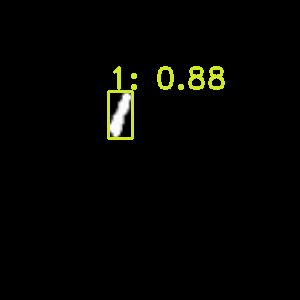

In [19]:
ultralytics_hub = UltralyticsHub.load("ultralytics_mnist_detection")
ultralytics_hub.inference("mnist/images", draw=True)
PIL.Image.open(ultralytics_hub.draw_dir / "1.png")

100%|██████████| 25/25 [00:00<00:00, 42.81it/s]


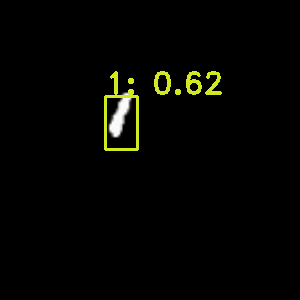

In [20]:
huggingface_hub = HuggingFaceHub.load("huggingface_mnist_detection")
huggingface_hub.inference("mnist/images", draw=True)
PIL.Image.open(huggingface_hub.draw_dir / "1.png")

100%|██████████| 25/25 [00:00<00:00, 62.38it/s]


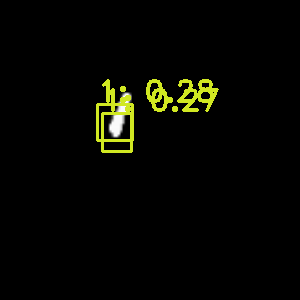

In [21]:
tx_model_hub = TxModelHub.load("tx_model_mnist_detection")
tx_model_hub.inference("mnist/images", draw=True)
PIL.Image.open(tx_model_hub.draw_dir / "1.png")

## Export to onnx

In [22]:
ultralytics_hub.export()

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/ultralytics/nn/modules.py:474: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  elif self.dynamic or self.shape != shape:
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/ultralytics/yolo/utils/tal.py:241: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  for i, stride in enumerate(strides):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/torch/onnx/utils.py:617: UserWarning: ONNX Preprocess - Removing mutation from node aten::sub_ on block input: 'tensor.1'. This changes graph semantics. (Triggered internally at ../t

ExportResult(export_file=PosixPath('hubs/ultralytics_mnist_detection/weights/model.onnx'))

In [23]:
huggingface_hub.export()

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:575: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_weights.size() != (batch_size * self.num_heads, target_len, source_len):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:582: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attention_mask.size() != (batch_size, 1, target_len, source_len):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:

ExportResult(export_file=PosixPath('hubs/huggingface_mnist_detection/weights/model.onnx'))

In [26]:
tx_model_hub.export(device="cpu")

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/torch/onnx/utils.py:617: UserWarning: ONNX Preprocess - Removing mutation from node aten::sub_ on block input: 'tensor.1'. This changes graph semantics. (Triggered internally at ../torch/csrc/jit/passes/onnx/remove_inplace_ops_for_onnx.cpp:335.)
  _C._jit_pass_onnx_remove_inplace_ops_for_onnx(graph, module)


ExportResult(export_file=PosixPath('hubs/tx_model_mnist_detection/weights/model.onnx'))

## Benchmark

In [27]:
ultralytics_hub.benchmark(image_size=320, batch_size=16)

100%|██████████| 100/100 [00:01<00:00, 97.22it/s]


{'inference_time': 1.0294418334960938,
 'fps': 1554.2403154204742,
 'image_size': [320, 320],
 'batch_size': 16,
 'precision': 'fp32',
 'device': 'cuda:0',
 'cpu_name': '13th Gen Intel(R) Core(TM) i9-13900KF',
 'gpu_name': 'NVIDIA GeForce RTX 4090'}

In [28]:
huggingface_hub.benchmark(image_size=320, batch_size=16)

100%|██████████| 100/100 [00:02<00:00, 42.96it/s]


{'inference_time': 2.328606128692627,
 'fps': 687.1063252325563,
 'image_size': [320, 320],
 'batch_size': 16,
 'precision': 'fp32',
 'device': 'cuda:0',
 'cpu_name': '13th Gen Intel(R) Core(TM) i9-13900KF',
 'gpu_name': 'NVIDIA GeForce RTX 4090'}

In [29]:
tx_model_hub.benchmark(image_size=320, batch_size=16)

100%|██████████| 100/100 [00:00<00:00, 113.23it/s]


{'inference_time': 0.8841898441314697,
 'fps': 1809.5661362992278,
 'image_size': [320, 320],
 'batch_size': 16,
 'precision': 'fp32',
 'device': 'cuda:0',
 'cpu_name': '13th Gen Intel(R) Core(TM) i9-13900KF',
 'gpu_name': 'NVIDIA GeForce RTX 4090'}